In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
#from config import db_password
import time

In [2]:
# Load the files to merge to create the dataset for movies
file_to_load1 = "Resources/datasets_2745_4700_movies.csv"
file_to_load2 = "Resources/MoviesOnStreamingPlatforms_updated.csv"
file_to_load3 = "Resources/tmdb_5000_movies.csv"

# Read the scv into a DataFrame
datasets_movies_df = pd.read_csv(file_to_load1, encoding="ISO-8859-1")
movies_onStreaming_df = pd.read_csv(file_to_load2)
tmbd_movies_df = pd.read_csv(file_to_load3)

# Print Dataframes
display(datasets_movies_df.head())
display(movies_onStreaming_df.head())
display(tmbd_movies_df.head())

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# Inspect the dataframes: datasets_movies_df
datasets_movies_df.columns.tolist()

['budget',
 'company',
 'country',
 'director',
 'genre',
 'gross',
 'name',
 'rating',
 'released',
 'runtime',
 'score',
 'star',
 'votes',
 'writer',
 'year']

In [4]:
# Inspect the dataframes: movies_onStreaming_df
movies_onStreaming_df.columns.tolist()

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [5]:
# Inspect the dataframes: tmbd_movies_df
tmbd_movies_df.columns.tolist()

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

In [6]:
# Check for null values on dataframes
print(f"datasets_movies_df: {datasets_movies_df.isnull().count()}")
print(f"movies_onStreaming_df: {movies_onStreaming_df.isnull().count()}")
print(f"tmbd_movies_df: {tmbd_movies_df.isnull().count()}")

datasets_movies_df: budget      6820
company     6820
country     6820
director    6820
genre       6820
gross       6820
name        6820
rating      6820
released    6820
runtime     6820
score       6820
star        6820
votes       6820
writer      6820
year        6820
dtype: int64
movies_onStreaming_df: Unnamed: 0         16744
ID                 16744
Title              16744
Year               16744
Age                16744
IMDb               16744
Rotten Tomatoes    16744
Netflix            16744
Hulu               16744
Prime Video        16744
Disney+            16744
Type               16744
Directors          16744
Genres             16744
Country            16744
Language           16744
Runtime            16744
dtype: int64
tmbd_movies_df: budget                  4803
genres                  4803
homepage                4803
id                      4803
keywords                4803
original_language       4803
original_title          4803
overview                4803
pop

In [7]:
Movies_df = pd.merge(datasets_movies_df, tmbd_movies_df, how="inner", left_on='name', right_on='title', suffixes=['_ds-movies','_tmbd'])
Movies_df
# Movies_df.columns.tolist()

,budget_ds-movies,company,country,director,genre,gross,name,rating,released,runtime_ds-movies,...,production_countries,release_date,revenue,runtime_tmbd,spoken_languages,status,tagline,title,vote_average,vote_count
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1986-08-22,52287414,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"For some, it's the last real taste of innocenc...",Stand by Me,7.8,1522
1,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1986-05-16,356830601,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Up there with the best of the best.,Top Gun,6.7,1698
2,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1986-07-18,183316455,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,This Time It's War,Aliens,7.7,3220
3,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1986-12-18,138530565,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The first casualty of war is innocence.,Platoon,7.5,1205
4,8800000.0,Rimfire Films,Australia,Peter Faiman,Adventure,174635000.0,Crocodile Dundee,PG-13,1986-09-26,97,...,"[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}]",1986-09-26,328203506,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,There's a little of him in all of us.,Crocodile Dundee,6.3,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183,8000000.0,Cinelou Films,USA,Bruce Beresford,Comedy,685143.0,Mr. Church,PG-13,2016-09-16,104,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-09-16,0,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He was the one person she could always count on.,Mr. Church,7.0,129
3184,18000000.0,Gold Circle Films,USA,Kirk Jones,Comedy,59573085.0,My Big Fat Greek Wedding 2,PG-13,2016-03-25,94,...,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2016-03-23,88923251,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,People change. Greeks don't.,My Big Fat Greek Wedding 2,5.5,322
3185,0.0,Bing Feng Bao Entertainment,USA,James Schamus,Drama,3399841.0,Indignation,R,2016-08-11,110,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-29,0,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on the novel by Philip Roth.,Indignation,6.8,69
3186,0.0,StudioCanal,UK,Susanna White,Crime,3152725.0,Our Kind of Traitor,R,2016-09-30,108,...,"[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2016-05-05,9930095,108.0,"[{""iso_639_1"": ""ru"", ""name"": ""P\u0443\u0441\u0...",Released,Who Can You Trust With The Truth?,Our Kind of Traitor,6.0,160


In [8]:
print(f"Movies_df: {Movies_df.isnull().count()}")

Movies_df: budget_ds-movies        3188
company                 3188
country                 3188
director                3188
genre                   3188
gross                   3188
name                    3188
rating                  3188
released                3188
runtime_ds-movies       3188
score                   3188
star                    3188
votes                   3188
writer                  3188
year                    3188
budget_tmbd             3188
genres                  3188
homepage                3188
id                      3188
keywords                3188
original_language       3188
original_title          3188
overview                3188
popularity              3188
production_companies    3188
production_countries    3188
release_date            3188
revenue                 3188
runtime_tmbd            3188
spoken_languages        3188
status                  3188
tagline                 3188
title                   3188
vote_average            3188
vot

In [9]:
# Merging the 3 datasets with an inner join
Movies_preliminary_df = pd.merge(Movies_df, movies_onStreaming_df, how="inner", left_on='name', right_on='Title', suffixes=['_df','_stream'])
Movies_preliminary_df
# after the merge only we got 702 rows

,budget_ds-movies,company,country,director,genre,gross,name,rating,released,runtime_ds-movies,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,16000000.0,Thorn EMI Screen Entertainment,UK,Russell Mulcahy,Action,5900000.0,Highlander,R,1986-03-07,116,...,0,0,1,0,0,Russell Mulcahy,"Action,Adventure,Fantasy",United Kingdom,English,116.0
1,25000000.0,Paramount Pictures,USA,Michael Ritchie,Action,79817937.0,The Golden Child,PG-13,1986-12-12,94,...,0,0,1,0,0,Michael Ritchie,"Action,Adventure,Comedy,Fantasy,Mystery",United States,English,94.0
2,1900000.0,Hemdale,USA,Tim Hunter,Crime,4600000.0,River's Edge,R,1987-05-08,99,...,1,0,0,0,0,Tim Hunter,"Crime,Drama",United States,English,99.0
3,16000000.0,Act III Communications,USA,Rob Reiner,Adventure,30857814.0,The Princess Bride,PG,1987-10-09,98,...,0,0,0,1,0,Rob Reiner,"Adventure,Family,Fantasy,Romance",United States,English,98.0
4,1000000.0,Cinemarque Entertainment BV,UK,Clive Barker,Horror,14564027.0,Hellraiser,R,1987-09-18,94,...,0,0,1,0,0,Clive Barker,"Horror,Thriller",United Kingdom,English,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,80000000.0,Walt Disney Pictures,USA,Craig Gillespie,Action,27550735.0,The Finest Hours,PG-13,2016-01-29,117,...,0,0,0,1,0,Craig Gillespie,"Action,Drama,History,Thriller",United States,English,117.0
698,0.0,20th Century Fox,South Korea,Hong-jin Na,Drama,785405.0,The Wailing,NOT RATED,2016-06-03,156,...,0,0,1,0,0,Hong-jin Na,"Horror,Mystery,Thriller","South Korea,United States","Korean,Japanese",156.0
699,65000000.0,Walt Disney Pictures,USA,David Lowery,Action,76204454.0,Pete's Dragon,PG,2016-08-12,102,...,0,0,0,1,0,David Lowery,"Action,Adventure,Comedy,Drama,Family,Fantasy",United States,English,102.0
700,8500000.0,Bron Studios,USA,Nate Parker,Biography,15858754.0,The Birth of a Nation,R,2016-10-07,120,...,0,0,1,0,0,D.W. Griffith,"Drama,History,War",United States,None,195.0


In [20]:
Movies_df.dtypes

budget_ds-movies        float64
company                  object
country                  object
director                 object
genre                    object
gross                   float64
name                     object
rating                   object
released                 object
runtime_ds-movies         int64
score                   float64
star                     object
votes                     int64
writer                   object
year                      int64
budget_tmbd               int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime_tmbd            float64
spoken_languages         object
status                   object
tagline 

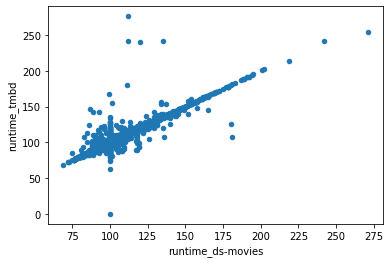

In [10]:
# Comparing the columns with same information and decide which one to keep
# Plotting runtime columns
Movies_df.fillna(0).plot(x='runtime_ds-movies', y='runtime_tmbd', kind='scatter')

In [19]:
Movies_df[['runtime_ds-movies', 'runtime_tmbd']]
Movies_df[Movies_df['runtime_ds-movies'] == Movies_df['runtime_ds-movies']][['runtime_ds-movies', 'runtime_tmbd']]

,runtime_ds-movies,runtime_tmbd
0,89,89.0
1,110,110.0
2,137,137.0
3,120,120.0
4,97,97.0
...,...,...
3183,104,104.0
3184,94,94.0
3185,110,110.0
3186,108,108.0


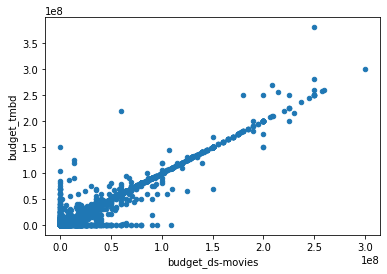

In [11]:
# Plotting budget columns
Movies_df.fillna(0).plot(x='budget_ds-movies', y='budget_tmbd', kind='scatter')

In [12]:
# Checking the vote columns are different
Movies_df[['vote_average', 'vote_count']]

,vote_average,vote_count
0,7.8,1522
1,6.7,1698
2,7.7,3220
3,7.5,1205
4,6.3,503
...,...,...
3183,7.0,129
3184,5.5,322
3185,6.8,69
3186,6.0,160


In [13]:
# Fill values for dataframe where budget is "0"
def fill_missing_budget(df, dsmovies_column, tmbd_column):
    df[dsmovies_column] = df.apply(
        lambda row: row[tmbd_column] if row[dsmovies_column] == 0 else row[dsmovies_column]
        , axis=1)
    #df.drop(columns=tmbd_column, inplace=True)

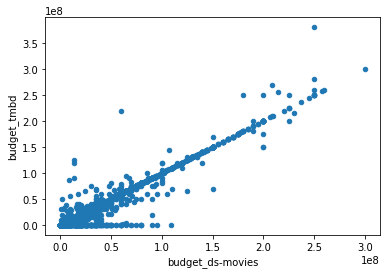

In [14]:
# Run the function to fill 0 values on ds_movies column
fill_missing_budget(Movies_df, 'budget_ds-movies', 'budget_tmbd')
Movies_df.fillna(0).plot(x='budget_ds-movies', y='budget_tmbd', kind='scatter')